In this we are making a ChatBot with the message history


States:

- messages between user and llm


In [1]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq

In [2]:
load_dotenv()

True

In [3]:
from langgraph.graph.message import add_messages


class ChatState(TypedDict):
    # Rather than storing message as string store them as Base Message Class->This list can contain all 4 messages, human, ai, system ,tool
    # We also need to add previous value not update
    # LangGraph inbuilt add message is more optimized

    messages: Annotated[list[BaseMessage], add_messages]

In [4]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [5]:
def chat_node(state: ChatState):
    # user query from state
    message = state["messages"]

    # send query to llm
    response = llm.invoke(message)

    # store response
    return {"messages": [response]}

In [6]:
graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

workflow = graph.compile()

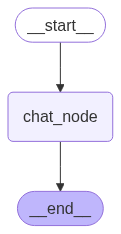

In [7]:
workflow

In [8]:
"""
Lets test
"""

initial_state = {"messages": ["What is the capital of India"]}

result = workflow.invoke(initial_state)

In [9]:
result

{'messages': [HumanMessage(content='What is the capital of India', additional_kwargs={}, response_metadata={}, id='e5dde2ea-9f01-43e0-888c-b4719e35735f'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 41, 'total_tokens': 50, 'completion_time': 0.001816735, 'prompt_time': 0.006084802, 'queue_time': 0.050438107, 'total_time': 0.007901537}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_46fc01befd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--ebee7e62-df3e-4a94-a0f5-66138d9e07f4-0', usage_metadata={'input_tokens': 41, 'output_tokens': 9, 'total_tokens': 50})]}

In [10]:
result["messages"]

[HumanMessage(content='What is the capital of India', additional_kwargs={}, response_metadata={}, id='e5dde2ea-9f01-43e0-888c-b4719e35735f'),
 AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 41, 'total_tokens': 50, 'completion_time': 0.001816735, 'prompt_time': 0.006084802, 'queue_time': 0.050438107, 'total_time': 0.007901537}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_46fc01befd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--ebee7e62-df3e-4a94-a0f5-66138d9e07f4-0', usage_metadata={'input_tokens': 41, 'output_tokens': 9, 'total_tokens': 50})]

In [11]:
result["messages"][0].content

'What is the capital of India'

In [12]:
result["messages"][-1].content

'The capital of India is New Delhi.'

In [13]:
# Basic interactive chatbot

while True:
    user_input = input("Enter Message: ")
    print("User: ", user_input)
    print("=" * 20)

    if user_input.strip().lower() in ["exit", "quit", "bye"]:
        break

    response = workflow.invoke({"messages": [HumanMessage(user_input)]})

    # Show last message which will always be AI message
    print("AI: ", response["messages"][-1].content)

User:  Hello who are you
AI:  I'm an AI assistant, which means I'm a computer program designed to simulate conversations and answer questions to the best of my knowledge. I'm here to help with any information or tasks you may need assistance with.

I don't have a personal identity, but I'm a friendly and helpful tool that's always ready to chat. I can provide information on a wide range of topics, from science and history to entertainment and culture.

What would you like to talk about?
User:  what are pre requisite for deep learning , tell in short
AI:  Here are the pre-requisites for deep learning:

1. **Mathematics**:
	* Linear Algebra
	* Calculus (Multivariable and Differential)
	* Probability and Statistics
	* Vector Calculus
2. **Programming**:
	* Python (preferably with NumPy, pandas, and Matplotlib)
	* Familiarity with a deep learning framework (e.g., TensorFlow, PyTorch)
3. **Computer Science**:
	* Data Structures (e.g., arrays, linked lists, trees)
	* Algorithms (e.g., sortin

- Now this Chat Bot has a big problem because it does not have memory.
- And the reason is we are using the loop and we are ending the message after chat node.
- We are invoking in loop, so everytime we invoke all states are getting clear and it has a fresh list


In [ ]:
while True:
    user_input = input("Enter Message: ")
    print("User: ", user_input)
    print("=" * 20)

    if user_input.strip().lower() in ["exit", "quit", "bye"]:
        break

    response = workflow.invoke({"messages": [HumanMessage(user_input)]})

    # Show last message which will always be AI message
    print("AI: ", response["messages"][-1].content)

User:  Hellp my name is Anas
AI:  Nice to meet you, Anas. Is there something I can help you with today?
User:  What is my name
AI:  I don't have any information about your name. I'm a large language model, I don't have personal knowledge or access to your personal information. Each time you interact with me, it's a new conversation and I don't retain any information from previous conversations.

If you'd like to share your name with me, I can use it in our conversation. Alternatively, you can remain anonymous and we can still have a conversation.
User:  exit
